### Checklist for submission

It is extremely important to make sure that:

1. Everything runs as expected (no bugs when running cells);
2. The output from each cell corresponds to its code (don't change any cell's contents without rerunning it afterwards);
3. All outputs are present (don't delete any of the outputs);
4. Fill in all the places that say `# YOUR CODE HERE`, or "**Your answer:** (fill in here)".
5. Never copy/paste any notebook cells. Inserting new cells is allowed, but it should not be necessary.
6. The notebook contains some hidden metadata which is important during our grading process. **Make sure not to corrupt any of this metadata!** The metadata may for example be corrupted if you copy/paste any notebook cells, or if you perform an unsuccessful git merge / git pull. It may also be pruned completely if using Google Colab, so watch out for this. Searching for "nbgrader" when opening the notebook in a text editor should take you to the important metadata entries.
7. Although we will try our very best to avoid this, it may happen that bugs are found after an assignment is released, and that we will push an updated version of the assignment to GitHub. If this happens, it is important that you update to the new version, while making sure the notebook metadata is properly updated as well. The safest way to make sure nothing gets messed up is to start from scratch on a clean updated version of the notebook, copy/pasting your code from the cells of the previous version into the cells of the new version.
8. If you need to have multiple parallel versions of this notebook, make sure not to move them to another directory.
9. Although not forced to work exclusively in the course Docker environment, you need to make sure that the notebook will run in that environment, i.e. that you have not added any additional dependencies.

Failing to meet any of these requirements might lead to either a subtraction of POEs (at best) or a request for resubmission (at worst).

We advise you the following steps before submission for ensuring that requirements 1, 2, and 3 are always met: **Restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). This might require a bit of time, so plan ahead for this (and possibly use Google Cloud's GPU in HA1 and HA2 for this step). Finally press the "Save and Checkout" button before handing in, to make sure that all your changes are saved to this .ipynb file.

### Check Python version

In [7]:
from platform import python_version_tuple
assert python_version_tuple()[:2] == ('3','7'), "You are not running Python 3.7. Make sure to run Python through the course Docker environment, or alternatively in the provided Conda environment."

### Check that notebook server has access to all required resources, and that notebook has not moved

In [8]:
import os
nb_dirname = os.path.abspath('')
assert nb_dirname != '/notebooks', \
    '[ERROR] The notebook server appears to have been started at the same directory as the assignment. Make sure to start it at least one level above.'
assignment_name = os.path.basename(nb_dirname)
assert assignment_name in ['IHA1', 'IHA2', 'HA1', 'HA2', 'HA3'], \
    '[ERROR] The notebook appears to have been moved from its original directory'

### Run the following cells to verify that your notebook is up-to-date and not corrupted in any way

In [9]:
%%javascript
IPython.notebook.kernel.execute(`nb_fname = '${IPython.notebook.notebook_name}'`);

<IPython.core.display.Javascript object>

In [10]:
import sys
sys.path.append('..')
from ha_utils import check_notebook_uptodate_and_not_corrupted
check_notebook_uptodate_and_not_corrupted(nb_dirname, nb_fname)

[SUCCESS] No major notebook mismatch found when comparing to latest GitHub version. (There might be minor updates, but even that is the case, submitting your work based on this notebook version would be acceptable.)


### Fill in group number and member names:

In [11]:
GROUP = ""
NAME1 = "Sanjiv Thottathodhi"
NAME2 = ""

# IHA2 - Catching Pokemon

![](http://tibetanitech.com/wp-content/uploads/2016/09/Pokemon-GO.jpg)

In this home assignment, you'll apply roughly the same principles we used when doing logistic regression on the Iris dataset, but on a new and very interesting dataset. We'll use the [Predict'em All](https://www.kaggle.com/semioniy/predictemall) dataset from Kaggle (download the dataset directly from them). This dataset consists of roughly 293,000 [pokemon](http://www.pokemongo.com/) sightings (historical appearances of Pokemon in the Pokemon Go game), having coordinates, time, weather, population density, distance to pokestops/ gyms etc. as features. A comprehensive list of all the features is available at [the dataset's homepage](https://www.kaggle.com/semioniy/predictemall)

The context is simple: you are a Pokemon hunter, and there are only three Pokemon left for you to complete your collection. You'll do anything to capture them, including changing where you'll spend your next holidays! You know that some Pokemon only spawn in certain places of the world. Since you like machine learning so much, you figure it would be a great idea to train a classifier that, based on a location's latitude and longitude, can tell us which Pokemon is more likely to appear there.

The assignment is broken down into six steps.

1. Loading the data and extracting the desired subset of it
2. Visualization of the dataset
3. Preprocessing
4. Training
5. Evaluation
6. Exploration


Feel free to add cells wherever you see fit, and play around with this notebook as much as you want when developing the solutions. However, the solution you upload to ping-pong must have the exact format shown here, with only the cells present here.

Don't restrict yourself only to what was taught so far. Some of the tasks might require you to search for new information. [The python docs](https://docs.python.org/3/), [pytorch docs](https://pytorch.org/docs/stable/index.html), [stackoverflow](https://stackoverflow.com/), and Google are your friends!

**Hint:** Solving Computer Lab 1 (CL1) is a good way to get prepared for this assignment.

## 0. Imports

Import any necessary modules here.

In [12]:
# YOUR CODE HERE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
import seaborn as sns

%matplotlib inline

## 1. Loading and extracting subset

Load the `'300k.csv'` file using pandas.

In [13]:
# YOUR CODE HERE
dataset = pd.read_csv("300k.csv")

C:\Anaconda3\envs\dml\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Create a new `DataFrame` with only the columns `latitude`, `longitude`, and `class`.

In [14]:
# YOUR CODE HERE
newDataSet = dataset[['latitude', 'longitude', 'class']]

Note that the `class` column specifies which pokemon it is. However, it only has the numerical id of the pokemon. For convenience, use the following dictionary to convert between ids and names.

In [15]:
name_dict={1: 'Bulbasaur', 2: 'Ivysaur', 3: 'Venusaur', 4: 'Charmander', 5: 'Charmeleon', 6: 'Charizard', 7: 'Squirtle', 8: 
          'Wartortle', 9: 'Blastoise', 10: 'Caterpie', 11: 'Metapod', 12: 'Butterfree', 13: 'Weedle', 14: 'Kakuna', 
          15: 'Beedrill', 16: 'Pidgey', 17: 'Pidgeotto', 18: 'Pidgeot', 19: 'Rattata', 20: 'Raticate', 21: 'Spearow',
          22: 'Fearow', 23: 'Ekans', 24: 'Arbok', 25: 'Pikachu', 26: 'Raichu', 27: 'Sandshrew', 28: 'Sandslash', 
          29: 'Nidoran F', 30: 'Nidorina', 31: 'Nidoqueen',32: 'Nidoran M', 33: 'Nidorino', 34: 'Nidoking', 35: 'Clefairy',
          36: 'Clefable', 37: 'Vulpix', 38: 'Ninetales', 39: 'Jigglypuff', 40: 'Wigglytuff', 41: 'Zubat', 42: 'Golbat', 
          43: 'Oddish', 44: 'Gloom', 45: 'Vileplume', 46: 'Paras', 47: 'Parasect', 48: 'Venonat', 49: 'Venomoth',
          50: 'Diglett', 51: 'Dugtrio', 52: 'Meowth', 53: 'Persian', 54: 'Psyduck',55: 'Golduck', 56: 'Mankey', 
          57: 'Primeape', 58: 'Growlithe', 59: 'Arcanine', 60: 'Poliwag', 61: 'Poliwhirl', 62: 'Poliwrath',
          63: 'Abra', 64: 'Kadabra', 65: 'Alakazam', 66: 'Machop', 67: 'Machoke', 68: 'Machamp', 69: 'Bellsprout', 
          70: 'Weepinbell', 71: 'Victreebel', 72: 'Tentacool', 73: 'Tentacruel', 74: 'Geodude', 75: 'Graveler',
          76: 'Golem', 77: 'Ponyta', 78: 'Rapidash', 79: 'Slowpoke', 80: 'Slowbro', 81: 'Magnemite', 82: 'Magneton',
          83: "Farfetch'd", 84: 'Doduo', 85: 'Dodrio', 86: 'Seel', 87: 'Dewgong', 88: 'Grimer', 89: 'Muk', 
          90: 'Shellder', 91: 'Cloyster', 92: 'Gastly', 93: 'Haunter', 94: 'Gengar', 95: 'Onix', 96: 'Drowzee',
          97: 'Hypno', 98: 'Krabby', 99: 'Kingler', 100: 'Voltorb', 101: 'Electrode', 102: 'Exeggcute', 103: 'Exeggutor', 
          104: 'Cubone', 105: 'Marowak', 106: 'Hitmonlee', 107: 'Hitmonchan', 108: 'Lickitung', 109: 'Koffing',
          110: 'Weezing', 111: 'Rhyhorn', 112: 'Rhydon', 113: 'Chansey', 114: 'Tangela', 115: 'Kangaskhan', 116: 'Horsea', 
          117: 'Seadra', 118: 'Goldeen', 119: 'Seaking', 120: 'Staryu', 121: 'Starmie', 122: 'Mr. Mime', 123: 'Scyther', 
          124: 'Jynx', 125: 'Electabuzz', 126: 'Magmar', 127: 'Pinsir', 128: 'Tauros', 129: 'Magikarp', 130: 'Gyarados', 
          131: 'Lapras', 132: 'Ditto', 133: 'Eevee', 134: 'Vaporeon', 135: 'Jolteon', 136: 'Flareon', 137: 'Porygon', 
          138: 'Omanyte', 139: 'Omastar', 140: 'Kabuto', 141: 'Kabutops', 142: 'Aerodactyl', 143: 'Snorlax', 144: 'Articuno',
          145: 'Zapdos', 146: 'Moltres', 147: 'Dratini', 148: 'Dragonair', 149: 'Dragonite', 150: 'Mewtwo', 'Bulbasaur': 1, 'Ivysaur': 2, 'Venusaur': 3, 'Charmander': 4, 'Charmeleon': 5, 'Charizard': 6, 'Squirtle': 7, 'Wartortle': 8, 'Blastoise': 9, 'Caterpie': 10, 'Metapod': 11, 'Butterfree': 12, 'Weedle': 13, 'Kakuna': 14, 'Beedrill': 15, 'Pidgey': 16, 'Pidgeotto': 17, 'Pidgeot': 18, 'Rattata': 19, 'Raticate': 20, 'Spearow': 21, 'Fearow': 22, 'Ekans': 23, 'Arbok': 24, 'Pikachu': 25, 'Raichu': 26, 'Sandshrew': 27, 'Sandslash': 28, 'Nidoran F': 29, 'Nidorina': 30, 'Nidoqueen': 31, 'Nidoran M': 32, 'Nidorino': 33, 'Nidoking': 34, 'Clefairy': 35, 'Clefable': 36, 'Vulpix': 37, 'Ninetales': 38, 'Jigglypuff': 39, 'Wigglytuff': 40, 'Zubat': 41, 'Golbat': 42, 'Oddish': 43, 'Gloom': 44, 'Vileplume': 45, 'Paras': 46, 'Parasect': 47, 'Venonat': 48, 'Venomoth': 49, 'Diglett': 50, 'Dugtrio': 51, 'Meowth': 52, 'Persian': 53, 'Psyduck': 54, 'Golduck': 55, 'Mankey': 56, 'Primeape': 57, 'Growlithe': 58, 'Arcanine': 59, 'Poliwag': 60, 'Poliwhirl': 61, 'Poliwrath': 62, 'Abra': 63, 'Kadabra': 64, 'Alakazam': 65, 'Machop': 66, 'Machoke': 67, 'Machamp': 68, 'Bellsprout': 69, 'Weepinbell': 70, 'Victreebel': 71, 'Tentacool': 72, 'Tentacruel': 73, 'Geodude': 74, 'Graveler': 75, 'Golem': 76, 'Ponyta': 77, 'Rapidash': 78, 'Slowpoke': 79, 'Slowbro': 80, 'Magnemite': 81, 'Magneton': 82, 'Farfetch\'d': 83, 'Doduo': 84, 'Dodrio': 85, 'Seel': 86, 'Dewgong': 87, 'Grimer': 88, 'Muk': 89, 'Shellder': 90, 'Cloyster': 91, 'Gastly': 92, 'Haunter': 93, 'Gengar': 94, 'Onix': 95, 'Drowzee': 96, 'Hypno': 97, 'Krabby': 98, 'Kingler': 99, 'Voltorb': 100, 'Electrode': 101, 'Exeggcute': 102, 'Exeggutor': 103, 'Cubone': 104, 'Marowak': 105, 'Hitmonlee': 106, 'Hitmonchan': 107, 'Lickitung': 108, 'Koffing': 109, 'Weezing': 110, 'Rhyhorn': 111, 'Rhydon': 112, 'Chansey': 113, 'Tangela': 114, 'Kangaskhan': 115, 'Horsea': 116, 'Seadra': 117, 'Goldeen': 118, 'Seaking': 119, 'Staryu': 120, 'Starmie': 121, 'Mr. Mime': 122, 'Scyther': 123, 'Jynx': 124, 'Electabuzz': 125, 'Magmar': 126, 'Pinsir': 127, 'Tauros': 128, 'Magikarp': 129, 'Gyarados': 130, 'Lapras': 131, 'Ditto': 132, 'Eevee': 133, 'Vaporeon': 134, 'Jolteon': 135, 'Flareon': 136, 'Porygon': 137, 'Omanyte': 138, 'Omastar': 139, 'Kabuto': 140, 'Kabutops': 141, 'Aerodactyl': 142, 'Snorlax': 143, 'Articuno': 144, 'Zapdos': 145, 'Moltres': 146, 'Dratini': 147, 'Dragonair': 148, 'Dragonite': 149, 'Mewtwo': 150}

In [16]:
# example usage (you can index either by name or id)
print(name_dict['Gengar'])
print(name_dict[94])

94
Gengar


We are only interested in three specific pokemon: Diglett, Seel, and Tauros.

<table style="width:100%">
  <tr>
    <th> <center>Diglett</center> </th>
    <th> <center>Seel</center> </th> 
    <th> <center>Tauros</center> </th>
  </tr>
  <tr>
    <td><img src=https://assets.pokemon.com/assets/cms2/img/pokedex/full/050_f2.png alt=Digglet></td>
    <td><img src=https://pokemon.gamepedia.com/media/pokemon.gamepedia.com/thumb/f/f1/Seel.png/200px-Seel.png?version=2c32fbe0af2d0da707e5dbcb40472fbf></td>
    <td><img src=https://vignette2.wikia.nocookie.net/pokemon/images/0/01/128Tauros_AG_anime.png/revision/latest?cb=20140924030616></td>
  </tr>
</table>



Filter the dataset to contain only these pokemon.

In [17]:
# YOUR CODE HERE
# creating a list with the 3 required pokemon classes
my_class = [name_dict['Diglett'], name_dict['Seel'], name_dict['Tauros']]
#pandas isin() command to extract those 3 classes and store into a new dataframe
dataset_three=dataset[newDataSet['class'].isin(my_class)]
#dataset containing just longitude, latidude and class of 3 pokemons.
newDataSet_three=newDataSet[newDataSet['class'].isin(my_class)]

## 2. Visualization of the dataset

Plot a histogram of the number of occurrences of each class.

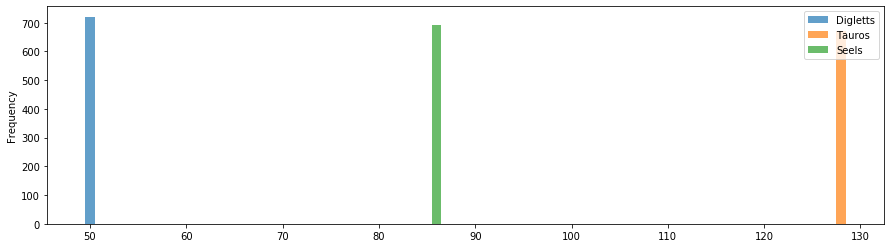

In [18]:
# YOUR CODE HERE
#Function to map class ID with corresponding index vector
def encode_pokemon(classID):
    if classID == 50:
        return 0    
    if classID == 86:
        return 1
    if classID == 128:
        return 2
    else:
        raise ValueError('Pokemon \'{}\' is not recognized.'.format(classID))        
# Array containing names of the pokemons.       
names = newDataSet_three['class'].unique()
# look to plot the histogram
for name in names:          
    classet= newDataSet_three[newDataSet_three["class"]==name];
    classet['class'].plot(kind="hist",bins=1, alpha=0.7, figsize=[15,4]);    
plt.legend(['Digletts','Tauros','Seels']);

Is the dataset balanced?

The Data set is not perfectly balanced. But I would say that the data set is fairly well balanced since the difference between the lowest pokemon occurence (value) and the highest is not very large.

Plot a scatter plot where the first dimension is latitude, the second is longitude, and each point is a Pokemon. Further, the color of each point should represent which Pokemon it is. Lastly, the marker at each point should be an `'x'`. Make sure to label each axis.

Hints:

- The `scatter` method from `matplotlib` accepts an argument called `c`.
- The `scatter` method also accepts an argument called `marker`.

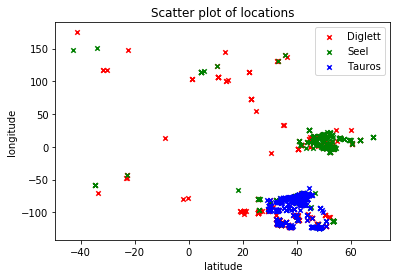

In [19]:
# YOUR CODE HERE
# Dataset of the 3 pokemon of interest with the long, lat and class values.
diglet_dataset=newDataSet_three[newDataSet_three['class']==50]
seel_dataset=newDataSet_three[newDataSet_three['class']==86]
tauros_dataset=newDataSet_three[newDataSet_three['class']==128]
# scatter plot
ax1 = diglet_dataset.plot(kind='scatter', x='latitude', y='longitude',marker='x', color='r', label='Diglett')    
ax2 = seel_dataset.plot(kind='scatter', x='latitude', y='longitude',marker='x', color='g', ax=ax1, label='Seel')    
ax3 = tauros_dataset.plot(kind='scatter', x='latitude', y='longitude',marker='x', color='b', ax=ax1, label='Tauros')
plt.title('Scatter plot of locations');

Is there any other visualization you think would be useful? If so, insert it here.

I would say the above two plots are a good enough representation of the data we have. But, given that in this case, digletts are all over the place. It would be more useful to have a seperate scatter plot for diglett and determining where they are more concentrated. This may help us to know which areas are more probable to find digletts.

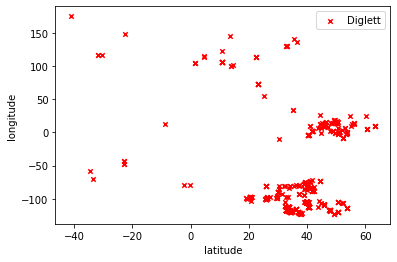

In [20]:
ax1 = diglet_dataset.plot(kind='scatter', x='latitude', y='longitude',marker='x', color='r', label='Diglett')

From this plot, we know that in the tauros region we find a lot of digletts concentrations too. So we might need another
input feature which will help us in distinguishing between a tauros and a digletts. Maybe Pressure, weather or time of occurance? 

How hard do you think the problem is? Which classes can/cannot be easily separated?


From looking at the scatter plot, it seems to me like seperating tauros and seel should be possible. And seperating diglett  could be challenging.

Which accuracy do you expect to achieve?

Looking at the dataset in the scatter plot, an accuracy of about 50% should be possible. Since two of the pokemon's
have a clear distinct boundaries between them. But I expect to achieve around 60%.

## 3. Preprocessing

Prepare input and output vectors.

In [21]:
# YOUR CODE HERE
# input to nn
x=newDataSet_three[['longitude', 'latitude']].values
# Preparing the output vector. Enconding them to numeric values required for nn
temp = map(encode_pokemon, newDataSet_three['class'].values)
# output to nn
y = np.array(list(temp))

Separate your data into training and test sets. 20% of the data should be in the test set.

In [22]:
# YOUR CODE HERE
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)
torch_x = torch.tensor(x_train, dtype=torch.float32)
torch_y = torch.tensor(y_train, dtype=torch.long)
t_dataset = TensorDataset(torch_x, torch_y)
t_data_loader = DataLoader(t_dataset, batch_size=32, shuffle=True)

## 4. Training

Choose an architecture for your network.

In [23]:
# YOUR CODE HERE
from torch import nn
import torch.nn.functional as F
class LogisticRegressor(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin1 = nn.Linear(2,4)    
        self.lin2 = nn.Linear(4,4)
        self.lin3 = nn.Linear(4,4)
        self.lin4 = nn.Linear(4,3)   

    def forward(self, xb):                
        xb=F.relu(self.lin1(xb))
        xb=F.relu(self.lin2(xb))
        xb=F.relu(self.lin3(xb))
        return self.lin4(xb)
    
model = LogisticRegressor()

loss_fn = nn.CrossEntropyLoss()

from torch import optim
optimizer = optim.Adam(model.parameters(), lr=0.015)

Train the network. When training, separate 30% of your training data into a validation set.

In [24]:
# YOUR CODE HERE
from torch.utils.data import random_split
train_t_dataset, val_t_dataset = random_split(t_dataset, [1166, 500])

train_t_data_loader = DataLoader(train_t_dataset, batch_size=64, shuffle=True)
val_t_data_loader = DataLoader(val_t_dataset, batch_size=32)

for epoch in range(30):
    
    # Compute predictions and back-prop in the training set
    losses = []
    n_correct = 0
    for b_x, b_y in train_t_data_loader:
        pred = model(b_x)
        loss = loss_fn(pred, b_y)
        losses.append(loss.item())
        n_correct += sum(pred.argmax(dim=1) == b_y).item()
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    train_accuracy = n_correct/len(train_t_dataset)
    train_avg_loss = sum(losses)/len(losses)
        
    # Compute predictions in the validation set (with adagrad deactivated)
    losses = []
    n_correct = 0
    with torch.no_grad():
        for b_x, b_y in val_t_data_loader:
            pred = model(b_x)            
            loss = loss_fn(pred, b_y)
            losses.append(loss.item())           
            n_correct += sum(pred.argmax(dim=1) == b_y).item()
        val_accuracy = n_correct/len(val_t_dataset)
        val_avg_loss = sum(losses)/len(losses)        
        
    display_str = 'Epoch {} '
    display_str += '\tLoss: {:.3f} '
    display_str += '\tLoss (val): {:.3f}'
    display_str += '\tAccuracy: {:.2f} '
    display_str += '\tAccuracy (val): {:.2f}'
    print(display_str.format(epoch, train_avg_loss, val_avg_loss, train_accuracy, val_accuracy))

Epoch 0 	Loss: 1.465 	Loss (val): 0.928	Accuracy: 0.44 	Accuracy (val): 0.47
Epoch 1 	Loss: 0.894 	Loss (val): 0.909	Accuracy: 0.56 	Accuracy (val): 0.55
Epoch 2 	Loss: 0.867 	Loss (val): 0.876	Accuracy: 0.59 	Accuracy (val): 0.60
Epoch 3 	Loss: 0.839 	Loss (val): 0.822	Accuracy: 0.64 	Accuracy (val): 0.62
Epoch 4 	Loss: 0.822 	Loss (val): 0.801	Accuracy: 0.64 	Accuracy (val): 0.65
Epoch 5 	Loss: 0.804 	Loss (val): 0.831	Accuracy: 0.62 	Accuracy (val): 0.64
Epoch 6 	Loss: 0.802 	Loss (val): 0.814	Accuracy: 0.63 	Accuracy (val): 0.64
Epoch 7 	Loss: 0.801 	Loss (val): 0.792	Accuracy: 0.64 	Accuracy (val): 0.64
Epoch 8 	Loss: 0.791 	Loss (val): 0.790	Accuracy: 0.64 	Accuracy (val): 0.62
Epoch 9 	Loss: 0.790 	Loss (val): 0.791	Accuracy: 0.64 	Accuracy (val): 0.63
Epoch 10 	Loss: 0.785 	Loss (val): 0.795	Accuracy: 0.64 	Accuracy (val): 0.64
Epoch 11 	Loss: 0.801 	Loss (val): 0.817	Accuracy: 0.65 	Accuracy (val): 0.65
Epoch 12 	Loss: 0.796 	Loss (val): 0.792	Accuracy: 0.65 	Accuracy (val): 0

For you to pass this assignment, you must obtain an accuracy on the validation set greater than 50%. It may be necessary to search for a good architecture by trying several different ones. If you want a challenge, try getting an accuracy greater than 63%.

## 5. Evaluation

Once you achieved at least 50% accuracy in the validation set, we are done with training. Now we'll evaluate the performance of your classifier on the test set.

Compute the accuracy on the test set.

In [25]:
# YOUR CODE HERE
test_inputs = torch.tensor(x_test, dtype=torch.float32)
test_outputs = torch.tensor(y_test, dtype=torch.long)
network_pred =model(test_inputs).argmax(dim=1)
count = 0;
for index in range(len(test_outputs)):
    if network_pred[index]==test_outputs[index]:
        count = count +1;

accuracy = count/len(network_pred)
print("Accuracy: %.2f" % accuracy)

Accuracy: 0.66


Compute the confusion matrix of your predictions on the test set.

In [26]:
# YOUR CODE HERE
from sklearn.metrics import confusion_matrix
confusion_matrix(test_outputs, network_pred)

array([[ 70,  28,  45],
       [  5,  86,  39],
       [ 24,   0, 120]], dtype=int64)

What can you conclude from the computed accuracy and confusion matrix?

The confusion matrix helps understand the classifications made by our nueral network. For example, using the confusion matrix we can determine the number of incorrect classifications made for a given class of pokemon.
The accuracy indicates that the network is 64% accurate with the test set.

## 6. Exploration

You have now trained and evaluated a neural network for this particular classification task. Can you provide a brief explanation as to how you could use it to decide where to travel, if you're interested in capturing the aforementioned Pokemons?

The nueral network that we have right now helps us in determining the probability (or classify the pokemons) of getting a specific type of pokemon 
based on the location or in this case, the longitude and latitude coorodinates that we would like to visit which would be the input to nueral network.

So the network can be used by providing the input coordinates to the network and determining the type of pokemon that can be found in that location. And based on the results we can change the input coordinates accordingly to find the right type of pokemon we want to catch.

Is(are) there any other feature(s) from the original dataset (e.g. hour of the day, pressure, wind speed, population density, etc.) which you think would be valuable to add as an input feature to your classifier to improve its performance? 

Yes. I think including the pressure, time of occurancce and population density features could be used to get more accurate predictions of our pokemon.

To investigate your hypothesis, plot a histogram of the selected feature(s) for each one of the pokemons we're interested in. For example, if you think pressure and population density are valuable for prediction, plot 6 histograms. 3 of them will be the pressure histograms for each class ('Diglett', 'Seel' and 'Tauros'), and the other 3 will be the population density for each class.

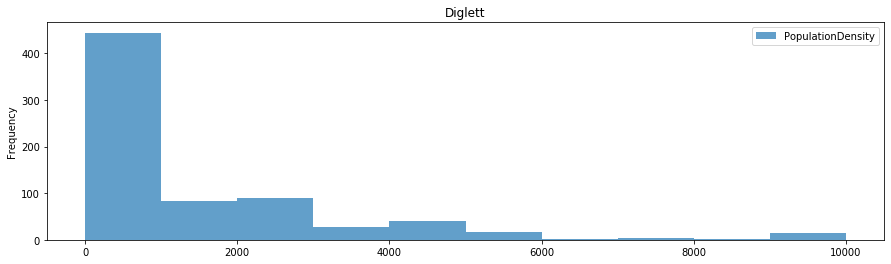

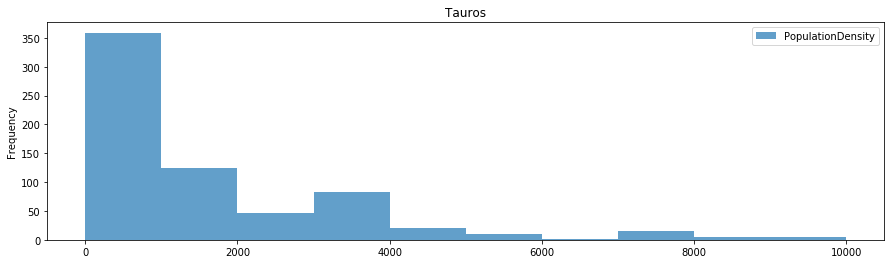

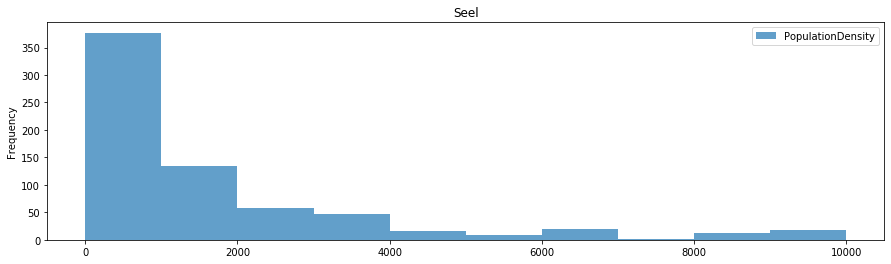

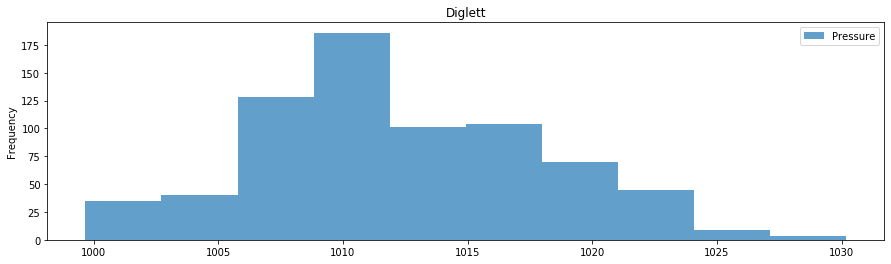

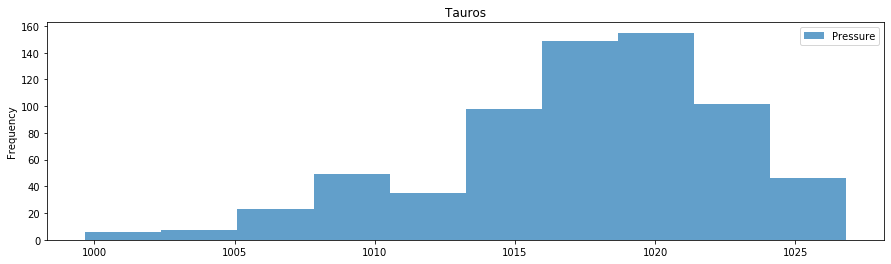

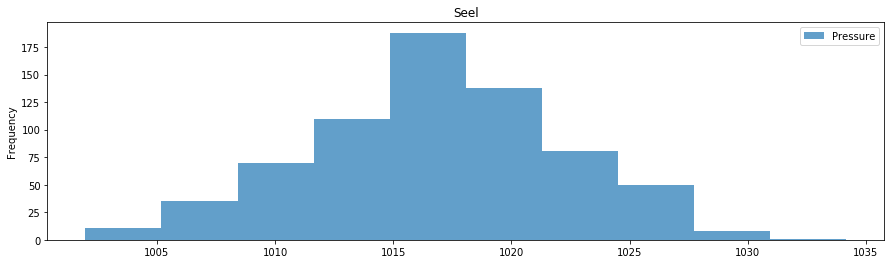

In [27]:
# YOUR CODE HERE
feature_set_temp = dataset[['population_density', 'pressure', 'class']]
feature_set = feature_set_temp[feature_set_temp['class'].isin(my_class)];
for name in names:
    fig, axs = plt.subplots()
    my_set=feature_set[feature_set["class"]==name];
    my_set['population_density'].plot(kind="hist",bins=10, alpha=0.7, figsize=[15,4], title=name_dict[name]);
    plt.legend(['PopulationDensity']);
for name in names:
    fig, axs = plt.subplots()
    my_set=feature_set[feature_set["class"]==name];
    my_set['pressure'].plot(kind="hist",bins=10, alpha=0.7, figsize=[15,4], title=name_dict[name]);
    plt.legend(['Pressure']);

What does(do) this(ese) histogram(s) show you? Could it be beneficial to add this(ese) new feature(s) as input? Explain why/why not.

The histograms shows us the range of values (in this case, the population density and pressure values) at which the pokemons are most likely to be found. 
As I mentioned earlier, we might need an input feature to distinguish between a diglett and tauros. So observing the pressure histogram above, we can see a slight difference in the pressures at which both of these pokemons occur. This input feature maybe used to possibly get a better acuracy.

## 7. (optional)

Assuming you found useful new features in the last part of this assignment, train a new classifier that uses these featues as well. Did the accuracy on the validation set improve? What's the highest accuracy you can achieve?

In [28]:
# YOUR CODE HERE